# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неполное среднее', 'Среднее', 'Ученая степень', 'Два и более высших образования', 'Высшее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Состою в браке', 'Не состоял в браке', 'Вдовец/Вдова', 'Разведен(а)', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Другие сферы', 'Химия/Парфюмерия/Фармацевтика', 'Наука', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Сборочные производства', 'Маркетинг', 'Развлечения/Искусство', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Образование', 'Транспорт', 'Подбор персонала', 'Торговля', 'ЧОП/Детективная д-ть', 'Сельское хозяйство', 'Строительство', 'Салоны красоты и здоровья', 'Туризм', 'Недвижимость', 'Информационные услуги', 'Нефтегазовая промышленность', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Логистика', 'Управляющая компания', 'Металлургия/Промышленность/Машиностроение', 'Государственная служба', 'Страхование'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
nans = lambda df: df[df.isnull().T.any()]
df_tmp = nans(df.drop('PREVIOUS_CARD_NUM_UTILIZED',1).drop('TP_PROVINCE',1))
df_tmp[['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','REGION_NM','WORK_TIME']]

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,REGION_NM,WORK_TIME
1,NaN,NaN,NaN,NaN,NaN,ЦЕНТРАЛЬНЫЙ 1,NaN
5,NaN,NaN,NaN,NaN,NaN,ПРИВОЛЖСКИЙ,NaN
8,NaN,NaN,NaN,NaN,NaN,ЗАПАДНО-СИБИРСКИЙ,NaN
12,NaN,NaN,NaN,NaN,NaN,ЗАПАДНО-СИБИРСКИЙ,NaN
20,NaN,NaN,NaN,NaN,NaN,УРАЛЬСКИЙ,NaN
28,NaN,NaN,NaN,NaN,NaN,ЦЕНТРАЛЬНЫЙ 2,NaN
30,NaN,NaN,NaN,NaN,NaN,ЦЕНТРАЛЬНЫЙ 1,NaN
57,NaN,NaN,NaN,NaN,NaN,ЦЕНТРАЛЬНЫЙ 1,NaN
77,NaN,NaN,NaN,NaN,NaN,ЦЕНТРАЛЬНЫЙ 2,NaN
96,NaN,NaN,NaN,NaN,NaN,ПОВОЛЖСКИЙ,NaN


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [16]:
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    
    df_output = df_output.drop('AGREEMENT_RK',1)
    
    #df_output = df_output[~df['GEN_TITLE'].isnull()&~df['WORK_TIME'].\
    #                      isnull()&~df['REGION_NM'].isnull()&~df['TP_PROVINCE'].isnull()]
    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    df_output= df_output.fillna('')
    
    sep_rep = lambda x: x.replace(',', '.')
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output[i] = df_output[i].map(sep_rep).astype('float')
    
    for i in df_output.columns: # перебираем все столбцы
        if str(df_output[i].dtype) == 'object' and i  != 'sample':
            df_tmp = pd.get_dummies(df_output[i])
            df_output = df_output.join(pd.get_dummies(df_tmp), lsuffix='_df_output', rsuffix='_df_tmp')
            df_output = df_output.drop(i,1)    
            
            
    return df_output

In [17]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [18]:
y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET',1)

In [19]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X, X_test, y, y_test = train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
predict = []
predict_proba = []

model = DecisionTreeClassifier()
model.fit(X, y)
predict.append(model.predict(X_test))
predict_proba.append(model.predict_proba(X_test))

model = RandomForestClassifier()
model.fit(X, y)
predict.append(model.predict(X_test))
predict_proba.append(model.predict_proba(X_test))

model = LogisticRegression()
model.fit(X, y)
predict.append(model.predict(X_test))
predict_proba.append(model.predict_proba(X_test))

In [21]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

## Your Code Here
metrics = []
for i in predict:
    metrics.append([accuracy_score(y_test, i),precision_score(y_test, i),recall_score(y_test,i)])
metrics

[[0.8070943726735275, 0.1646090534979424, 0.14414414414414414],
 [0.8782570615283556, 0.4666666666666667, 0.012612612612612612],
 [0.8780380994088023, 0.3333333333333333, 0.0036036036036036037]]

In [22]:
for i in predict:
    print(classification_report(y_test, i))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89      4012
          1       0.16      0.14      0.15       555

avg / total       0.80      0.81      0.80      4567

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      4012
          1       0.47      0.01      0.02       555

avg / total       0.83      0.88      0.82      4567

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      4012
          1       0.33      0.00      0.01       555

avg / total       0.81      0.88      0.82      4567



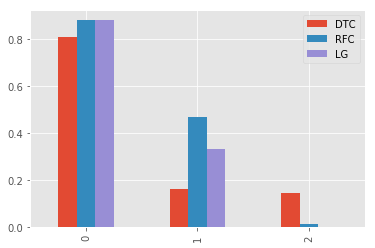

In [23]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
data = {
        'name': ['accuracy_score','precision_score','recall_score'],\
        'DTC' : metrics[0],\
        'RFC' : metrics[1],\
        'LG' : metrics[2]
        }       
data 
df_temp = pd.DataFrame.from_dict(data)
df_temp.plot.bar();

0.5214738666882236
0.5836286186485589
0.6381320003952108


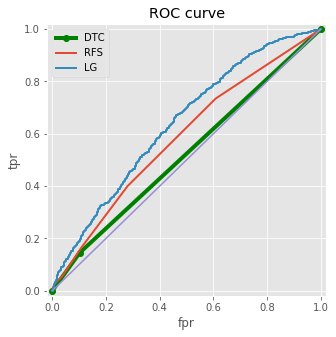

In [24]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


fpr0, tpr0, thresholds0 = roc_curve(y_test, predict_proba[0][:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba[1][:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba[2][:,1])
plt.figure(figsize=(5, 5))
line1, = plt.plot(fpr0, tpr0,'go-',label='DTC', linewidth=4)
line2, = plt.plot(fpr1, tpr1,label='RFS', linewidth=2)
line3, = plt.plot(fpr2, tpr2,label='LG', linewidth=2)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.02, 1.02))
plt.ylim((-0.02, 1.02))
plt.legend(handles=[line1, line2,line3])

for i in predict_proba:
    print(roc_auc_score(y_test, i[:,1]))

In [25]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc


df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop('TARGET',1)

print(cross_val_score(
    DecisionTreeClassifier(),
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
).mean())

print(cross_val_score(
    RandomForestClassifier(),
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
).mean())

print(cross_val_score(
    LogisticRegression(),
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10
).mean())


## Your Code Here

0.5380966692523708
0.5846038593670817
0.6372331001067912


In [26]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

#predict = 
## Your Code Here

df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

X, X_test, y, y_test = train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X, y)
predict = model.predict(df_test_preproc)
predict_proba = model.predict_proba(df_test_preproc)



0.6401197308973978


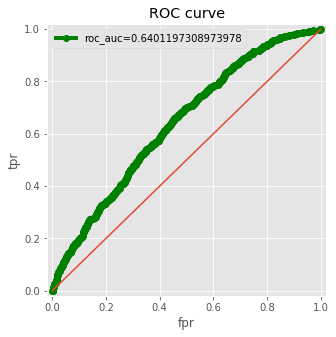

In [27]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

predict = model.predict(X_test)
predict_proba = model.predict_proba(X_test)

roc_auc_score_val = roc_auc_score(y_test, predict_proba[:,1])
fpr0, tpr0, thresholds0 = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
line1, = plt.plot(fpr0, tpr0,'go-',label='roc_auc={}'.format(roc_auc_score_val), linewidth=4)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.02, 1.02))
plt.ylim((-0.02, 1.02))
plt.legend(handles=[line1])
print(roc_auc_score_val)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность